In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\MD RUMMAN HAIDER\\Downloads\\stewart_gough_results3(Sheet1).csv")
df.head()

,Theta,Phi,Psi,Px,Py,Pz,ActuatorLengths_1,ActuatorLengths_2,ActuatorLengths_3,ActuatorLengths_4,ActuatorLengths_5,ActuatorLengths_6
0,-45,-45,-45,-2.5,-2.5,-2.5,7.285747,8.209941,7.345246,4.902313,4.354294,6.365027
1,-45,-45,-45,-2.5,-2.5,1.5,8.011009,7.629974,6.302756,1.615979,3.990679,7.946776
2,-45,-45,-45,-2.5,-2.5,5.5,10.618968,9.136440,6.750397,3.650202,6.810399,10.455970
3,-45,-45,-45,-2.5,-2.5,9.5,13.997993,12.186805,9.356869,7.361786,10.539931,13.894234
4,-45,-45,-45,-2.5,-0.5,-2.5,6.387508,6.325408,6.357652,4.808425,5.645219,6.917842


In [2]:
df.tail()

,Theta,Phi,Psi,Px,Py,Pz,ActuatorLengths_1,ActuatorLengths_2,ActuatorLengths_3,ActuatorLengths_4,ActuatorLengths_5,ActuatorLengths_6
2299,45,45,45,1.5,-0.5,9.5,7.596521,10.166987,12.819730,12.726033,10.090242,7.513235
2300,45,45,45,1.5,1.5,-2.5,5.920536,2.324579,3.192656,4.957362,5.253552,6.457197
2301,45,45,45,1.5,1.5,1.5,3.629032,1.877724,4.909555,6.238114,4.718959,4.526673
2302,45,45,45,1.5,1.5,5.5,4.948314,5.760630,8.307378,8.941592,6.978437,5.490704
2303,45,45,45,1.5,1.5,9.5,8.220469,9.595192,12.460036,12.629253,10.501336,8.291104


In [3]:
df.shape

(2304, 12)

In [4]:
df.isnull().sum()  #or df.isna().sum()

Theta                0
Phi                  0
Psi                  0
Px                   0
Py                   0
Pz                   0
ActuatorLengths_1    0
ActuatorLengths_2    0
ActuatorLengths_3    0
ActuatorLengths_4    0
ActuatorLengths_5    0
ActuatorLengths_6    0
dtype: int64

In [5]:
x=df.iloc[:1000,6:]
x

,ActuatorLengths_1,ActuatorLengths_2,ActuatorLengths_3,ActuatorLengths_4,ActuatorLengths_5,ActuatorLengths_6
0,7.285747,8.209941,7.345246,4.902313,4.354294,6.365027
1,8.011009,7.629974,6.302756,1.615979,3.990679,7.946776
2,10.618968,9.136440,6.750397,3.650202,6.810399,10.455970
3,13.997993,12.186805,9.356869,7.361786,10.539931,13.894234
4,6.387508,6.325408,6.357652,4.808425,5.645219,6.917842
...,...,...,...,...,...,...
995,10.230492,9.493409,9.526949,10.687271,11.137800,11.167170
996,3.603901,5.923628,6.765374,6.814640,5.159283,3.210189
997,1.723563,4.664484,6.323169,6.656116,5.474232,2.922718
998,4.950684,6.330584,8.201839,9.092914,8.176117,6.223410


In [6]:
x.min()

ActuatorLengths_1    1.008664
ActuatorLengths_2    0.623130
ActuatorLengths_3    0.213356
ActuatorLengths_4    0.598503
ActuatorLengths_5    0.292775
ActuatorLengths_6    0.399072
dtype: float64

In [7]:
len(x.ActuatorLengths_1.unique())

1000

In [8]:
y=df.iloc[:1000,:6] #or y=df.loc[:1000,'Pz']
y

,Theta,Phi,Psi,Px,Py,Pz
0,-45,-45,-45,-2.5,-2.5,-2.5
1,-45,-45,-45,-2.5,-2.5,1.5
2,-45,-45,-45,-2.5,-2.5,5.5
3,-45,-45,-45,-2.5,-2.5,9.5
4,-45,-45,-45,-2.5,-0.5,-2.5
...,...,...,...,...,...,...
995,-15,15,45,-0.5,1.5,9.5
996,-15,15,45,1.5,-2.5,-2.5
997,-15,15,45,1.5,-2.5,1.5
998,-15,15,45,1.5,-2.5,5.5


In [9]:
#y.groupby('Psi')['Psi'].agg('count')
#y.Pz.unique()

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train_poly)
x_test_scaled=scaler.transform(x_test_poly)

In [13]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train_scaled,y_train)

LinearRegression()

In [14]:
model_lr.score(x_test_scaled,y_test)

0.5364439647070128

In [15]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# model_lasso=Lasso()
# model_lasso.fit(x_train_scaled,y_train)
# model_lasso.score(x_test_scaled,y_test)

In [16]:
model_rf=RandomForestRegressor(random_state=42)
model_rf.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [17]:
model_rf.score(x_test_scaled,y_test)

0.4985941683459019

In [18]:
y_pred=model_rf.predict(x_test_scaled)
score=r2_score(y_test, y_pred)
score

0.4985941683459019

In [19]:
from sklearn.multioutput import MultiOutputRegressor
model_multi=MultiOutputRegressor(RandomForestRegressor(n_estimators=100))
model_multi.fit(x_train_scaled,y_train)
model_multi.score(x_test_scaled,y_test)

0.53115829017966

In [20]:
y_pred = model_multi.predict(x_test_scaled)

# Evaluate each target's R2 score
from sklearn.metrics import r2_score
for i, col in enumerate(['Theta', 'Phi', 'Psi', 'Px', 'Py', 'Pz']):
    print(f"R2 Score for {col}: {r2_score(y_test.iloc[:, i], y_pred[:, i])}")  
#y_pred in first line gets converted into numpy array due to .predict so iloc(only for pandas DataFrame) is not required but 
#y_test remains a DataFrame even after traintestsplit so iloc is required

R2 Score for Theta: 0.5141411073995343
R2 Score for Phi: 0.7103567840370102
R2 Score for Psi: 0.04089392060814223
R2 Score for Px: 0.5033786296667143
R2 Score for Py: 0.5043548117154811
R2 Score for Pz: 0.9138244876510773


In [21]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.metrics import accuracy_score

# # Wrap RandomForestClassifier in MultiOutputClassifier
# multi_model = MultiOutputClassifier(RandomForestClassifier())
# multi_model.fit(x_train_scaled, y_train)  # Train on all targets collectively

# # Predict and evaluate
# y_pred = multi_model.predict(x_test_scaled)

# # Evaluate accuracy for each target
# for i, col in enumerate(['Theta', 'Phi', 'Psi','Px', 'Py', 'Pz']):
#     print(f"Accuracy for {col}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")

# multi_model.score(x_test_scaled,y_test)

In [22]:
# import xgboost as xgb
# print(xgb.__version__)

In [23]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimator=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(x_train_scaled,y_train)
xgb.score(x_test_scaled,y_test)

C:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:36:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.5339701771736145

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model_NN=Sequential([Dense(128, activation='relu',input_dim=x_train_scaled.shape[1]), Dropout(0.2),
                  Dense(64, activation='relu'), Dropout(0.2),
                  Dense(32, activation='relu'),
                  Dense(y_train.shape[1])])
model_NN.compile(optimizer='adam',loss='mse',metrics=['mae'])
history=model_NN.fit(x_train_scaled,y_train,validation_split=0.2, epochs=100, batch_size=32, verbose=1)

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 546.1046 - mae: 15.8944 - val_loss: 586.5341 - val_mae: 16.6083
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 542.8502 - mae: 15.8743 - val_loss: 536.6466 - val_mae: 15.6778
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 484.4256 - mae: 14.6213 - val_loss: 454.0183 - val_mae: 13.5807
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 426.6526 - mae: 13.2262 - val_loss: 437.2448 - val_mae: 13.4138
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 417.4895 - mae: 13.1373 - val_loss: 429.1970 - val_mae: 13.2467
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 410.2575 - mae: 13.0765 - val_loss: 421.5063 - val_mae: 13.1586
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 392.7138 - mae: 12.8041 - val_loss: 411.8954 - val_mae: 13.0777
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 384.3961 - mae: 12.6454 - val_loss: 403.6412 - val_mae: 12.9683
Epoch 9/100
20/

In [25]:
#model_NN.score(x_test,y_test)     -score method doesnt work for neural networks

In [26]:
y_pred=model_NN.predict(x_test_scaled)
score_NN=r2_score(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [27]:
score_NN

#with 1000 rows and only angles score comes 61.11%
#with 1000 rows and only coordinates score comes 62.77%

0.4176328182220459

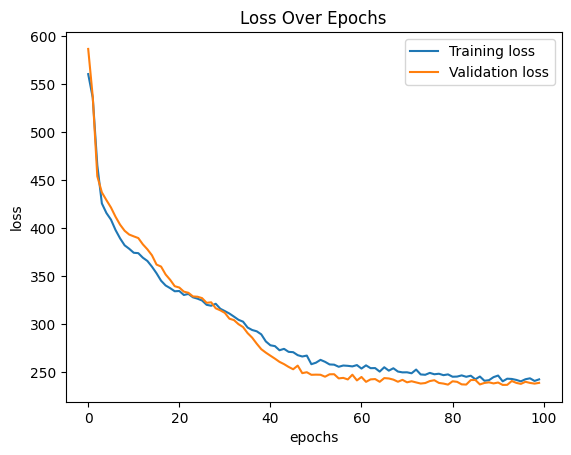

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Over Epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Number of layers
    num_layers = trial.suggest_int('num_layers', 2, 5)
    neurons = trial.suggest_categorical('neurons_per_layer', [64, 128, 256])
    dropout = trial.suggest_float('dropout_rate', 0.1, 0.5)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=x_train.shape[1]))
    
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout))
    
    model.add(Dense(y_train.shape[1]))  # Output layer
    
    learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 0.01)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model


In [30]:
def objective(trial):
    # Create the model with the current trial's hyperparameters
    model = create_model(trial)

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,  # Reserve part of training data for validation
        epochs=50,            # Reasonable number of epochs for tuning
        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
        verbose=0             # Suppress output for faster tuning
    )

    # Evaluate on the validation data
    val_loss = min(history.history['val_loss'])  # Minimize validation loss
    return val_loss


In [31]:
# # Create and optimize the study
# study = optuna.create_study(direction='minimize')  # We minimize validation loss
# study.optimize(objective, n_trials=50)            # Number of trials to try
# # Get the best trial
# best_trial = study.best_trial
# print("Best Parameters:", best_trial.params)

# # Get the best validation loss
# print("Best Validation Loss:", best_trial.value)

1st try)Best Parameters: {'num_layers': 4, 'neurons_per_layer': 256, 'dropout_rate': 0.14077575914488902, 'activation': 'relu', 'learning_rate': 0.0008494268692334483, 'batch_size': 32}
Best Validation Loss: 0.077537402510643

2nd try)Best Parameters: {'num_layers': 3, 'neurons_per_layer': 256, 'dropout_rate': 0.11844237167726139, 'activation': 'relu', 'learning_rate': 0.0012664614539610768, 'batch_size': 32}
Best Validation Loss: 0.07834803313016891

3rd try)Best Parameters: {'num_layers': 3, 'neurons_per_layer': 256, 'dropout_rate': 0.24259004146038685, 'activation': 'relu', 'learning_rate': 0.0013402394720778766, 'batch_size': 32}
Best Validation Loss: 0.07942096143960953

4th try)Best Parameters: {'num_layers': 4, 'neurons_per_layer': 256, 'dropout_rate': 0.2896053069333261, 'activation': 'relu', 'learning_rate': 0.0013578031372672396, 'batch_size': 32}
Best Validation Loss: 0.08185485005378723

In [32]:
# # Build the model with the best parameters
# best_params = best_trial.params

# # Define the model with best parameters
# final_model = Sequential()
# final_model.add(Dense(best_params['neurons_per_layer'], activation=best_params['activation'], input_dim=x_train.shape[1]))

# for _ in range(best_params['num_layers'] - 1):
#     final_model.add(Dense(best_params['neurons_per_layer'], activation=best_params['activation']))
#     final_model.add(Dropout(best_params['dropout_rate']))

# final_model.add(Dense(y_train.shape[1]))

# # Compile the model
# optimizer = Adam(learning_rate=best_params['learning_rate'])
# final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# # Train the final model
# history = final_model.fit(x_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=1)
# # Predict on test data
# y_pred = final_model.predict(x_test)

# # Rescale predictions back to original scale
# y_pred_original = scaler.inverse_transform(y_pred)
# y_test_original = scaler.inverse_transform(y_test)

# # Compute R² score
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test_original, y_pred_original)
# print("Final Model R² Score:", r2)

# #accuracy reaching is 46.49%

In [33]:
# import matplotlib.pyplot as plt

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [34]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import pipeline
# train=pd.read_csv('train.csv')
# test=pd.resd_csv('test.csv')
# train=train.dropna()
# duration_dict={'one':1,'two':2,'three':3,'four':4,'five':5}
# train['auction_duration']=train['auction_duration'].replace(duration_dict)
# x=train.drop(['id','outcome'],axis=1)
# y=train.drop('outcome',axis=1)
# test_x=test.drop('id',axis=1)
# train['bid to auc_ratio']=train['auction_bid']/(train['auction_ratio']+1e-5)
# test['bid to auc_ratio']=test['auction_bid']/(test['auction_ratio']+1e-5)
# from sklearn.model_selection import train_test_split
# x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
# pipeline=Pipeline([('scaler',MinMaxScaler()),('model_rf',RandomForestRegressor(random_state=42))])
# pipeline.fit(x_train,y_train)
# y_pred=pipeline.predict(x_test)
# score=accuracy_score(x_test,y_pred)
# submission=test[['id','outcome']]
# submission.to_csv('submission_file.csv',index=False)

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)
param_grid = {
    'max_depth': [7,9],
    'learning_rate': [0.005,0.01],
    'n_estimators': [400,500],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.5,0.6]
}

grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(x_train, y_train)
score=grid_search.score(x_test,y_test)
print("Best Parameters:", grid_search.best_params_)
print('score: ',score)

#with 1000 rows and only coordinates the score reaches 65.35%

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
score:  0.46549320220947266


Attempts on above xgboost with hyperparameter tuning:-
1st try) Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
score: 0.474696702316443
on:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

2nd try) Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}
score:  0.4756777365911838
param_grid = {
    'max_depth': [7,9],
    'learning_rate': [0.005,0.01],
    'n_estimators': [300,400],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.6,0.7]
}

3rd try) Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}
score:  0.4756777365911838
param_grid = {
    'max_depth': [7,9],
    'learning_rate': [0.005,0.01],
    'n_estimators': [400,500],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.5,0.6]
}


In [36]:
# from sklearn.svm import SVC
# model_svm=SVC()
# model_svm.fit(x_train_scaled,y_train)
# model_svm.score(x_test_scaled,y_test)

In [37]:
# import matplotlib.pyplot as plt
# for i in range(x.shape[1]):
#     plt.scatter(x.iloc[:,i],y,alpha=0.5)
#     plt.title(f'feature: {x.columns[i]} vs target: {y.columns[0]}')
#     plt.xlabel(f'feature: {x.columns[i]}')
#     plt.ylabel(f'target: {y.columns[0]}')
#     plt.show()